#   Loan Default Case Study 
# -------------------------------------------

# 1. Import the required libraries for the analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# 2. Load the loan information into a dataframe

On load of data from  the given load.csv file, an error occurs i.e.
DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)



In [2]:
loan = pd.read_csv("C:/Users/sharath_menon/Documents/DataScience/LoanDefault/8_GramenerCaseStudy/loan.csv", sep=',', error_bad_lines=False, index_col=False, dtype='unicode')
loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000,60 months,15.96%,170.08,C,C5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000,36 months,18.64%,109.43,E,E1,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600,60 months,21.28%,152.39,F,F2,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350,60 months,12.69%,121.45,B,B5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN


In [3]:
loan_metadata = pd.read_excel("C:/Users/sharath_menon/Documents/DataScience/LoanDefault/8_GramenerCaseStudy/Data_Dictionary.xlsx")
loan_metadata

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
5,annual_inc_joint,The combined self-reported annual income provi...
6,application_type,Indicates whether the loan is an individual ap...
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/...


# 3. Data Cleaning & Preparation

In [4]:
loan.shape

(39717, 111)

In [5]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,...,0.0,0.0,0.0,0.0,39020,39678,0.0,0.0,0.0,0.0
unique,39717,39717,885,1041,8205,2,371,15383,7,35,...,0.0,0.0,0.0,0.0,3,1,0.0,0.0,0.0,0.0
top,608388,663171,10000,10000,5000,36 months,10.99%,311.11,B,B3,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
freq,1,1,2833,2741,1309,29096,956,68,12020,2917,...,NaN,NaN,NaN,NaN,37339,39678,NaN,NaN,NaN,NaN


#### check the null percentage for columns

In [6]:
# check the null percentage for columns
# round((loan.isnull().sum() / len(loan) ) * 100, 2)

#lets check null percentage for columns which is having 1 or more missing values 
nullsFields = round((loan.isnull().sum() / len(loan) ) * 100, 2)
nullsFields.loc[nullsFields > 0].sort_values()
nullsFields

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

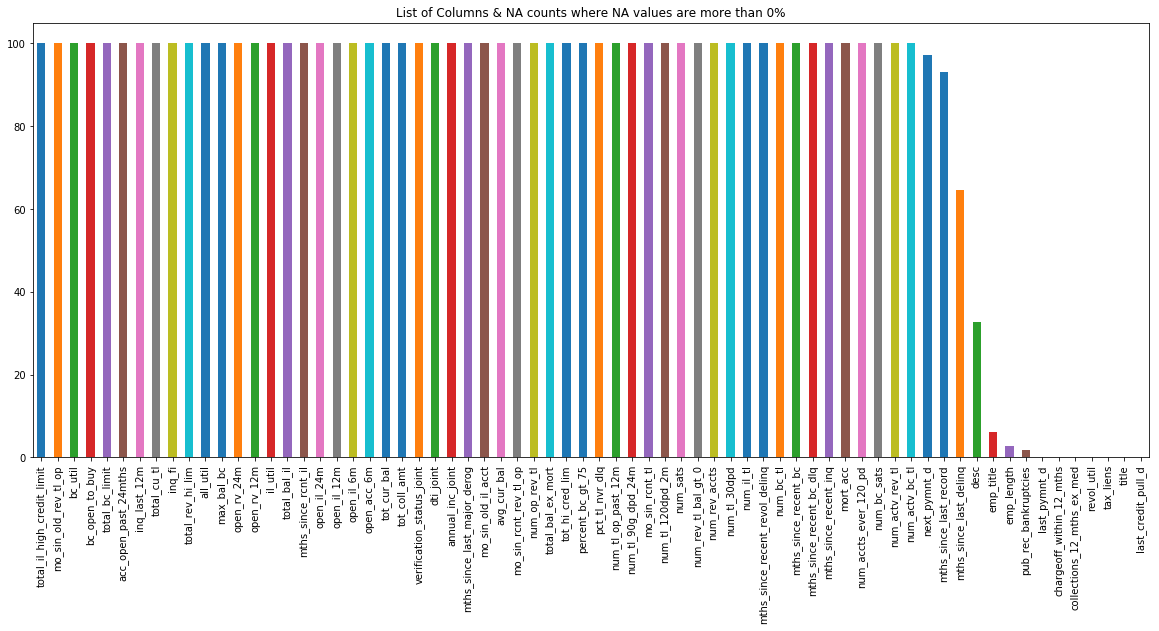

In [7]:
plt.figure(figsize=(20,8))
nullsFields.loc[nullsFields > 0].sort_values(ascending=False).plot(kind='bar')
plt.title('List of Columns & NA counts where NA values are more than 0%')
plt.show()

<b>Observation</b>: We can see from the above plot that there are many columns in the dataset where all the values are NA.
So, lets first drop all these fields and then will see what to do with remaining fields containing Nulls


#### drop the fields where all the values/elements are NaN

In [8]:
#marks the fields with their null percentage
nullPercentage = loan.isnull().sum() / len(loan)

# get the fields name which is having NULL percentage 100 % means all the elements for that fields must be NULL/NaNs
fields_allNan = nullPercentage[nullPercentage >= 1.00].index

#delete the fields which is having all the elements as NULL/NaNs

print("Before drop - rows,columns ",loan.shape)
loan.drop(fields_allNan, axis=1, inplace=True)
print("After drop  - rows,columns ",loan.shape)
print("Number of Columns dropped\t: ",len(fields_allNan))

Before drop - rows,columns  (39717, 111)
After drop  - rows,columns  (39717, 57)
Number of Columns dropped	:  54


#### drop the fields where all most values/elements are NULLs are not in use

In [9]:
fields_tobedropped1 = ['desc','mths_since_last_delinq','mths_since_last_record','next_pymnt_d']

print("Before drop - rows,columns ",loan.shape)
loan.drop(fields_tobedropped1, axis=1, inplace=True)
print("After drop  - rows,columns ",loan.shape)
print("Number of Columns dropped\t: ",len(fields_tobedropped1))

Before drop - rows,columns  (39717, 57)
After drop  - rows,columns  (39717, 53)
Number of Columns dropped	:  4


#### drop un-necessary fields

In [10]:
#fields which is having all the elements as "0"  or "0 and NA"
    # pymnt_plan
    # acc_now_delinq
    # collections_12_mths_ex_med
    # chargeoff_within_12_mths
    # delinq_amnt
    # tax_liens

#fields which is not required for analysis
    # id
    # member_id
    # zip_code
    # url
    # initial_list_status
    # policy_code
    # application_type
    # acc_now_delinq
    

fields_tobedropped = ['pymnt_plan','acc_now_delinq','collections_12_mths_ex_med','chargeoff_within_12_mths','delinq_amnt','tax_liens','id','member_id','zip_code','url','initial_list_status','policy_code','application_type','acc_now_delinq']


print("Before drop - rows,columns ",loan.shape)
loan.drop(fields_tobedropped, axis=1, inplace=True)
print("After drop  - rows,columns ",loan.shape)
print("Number of Columns dropped\t: ",len(fields_tobedropped))



Before drop - rows,columns  (39717, 53)
After drop  - rows,columns  (39717, 40)
Number of Columns dropped	:  14


In [11]:
# After droppping above fields check the null percentage for remaining columns
nullsFields2 = round((loan.isnull().sum() / len(loan) ) * 100, 2)
nullsFields2.loc[nullsFields > 0].sort_values(ascending=False)

emp_title               6.19
emp_length              2.71
pub_rec_bankruptcies    1.75
last_pymnt_d            0.18
revol_util              0.13
title                   0.03
last_credit_pull_d      0.01
dtype: float64

In [12]:
#remove the rows with null value for these variables
loan = loan[~loan.title.isnull()]
loan = loan[~loan.revol_util.isnull()]
loan = loan[~loan.last_pymnt_d.isnull()]

In [13]:
# the columns emp_title, emp_length have 6.19% and 2.71% missing value
# These columns have information about the customer/borrower like their job title and their employment length in years
# Let's remove the rows with nan/blank values for these varaibles
loan=loan[~loan.emp_title.isnull()]
loan=loan[~loan.emp_length.isnull()]

In [14]:
# for 'pub_rec_bankruptcies' categorical column with 1.76% missing data. 
# It tells us about the past number of public record bankruptcies of that borrower

loan.pub_rec_bankruptcies.value_counts()


0    34931
1     1495
2        7
Name: pub_rec_bankruptcies, dtype: int64

pub_rec_bankruptcies is having values like [0,1,2]. Almost 35000 records with 0 record of bankrupcies, 1500 records having one bankrupcies case and 7 records with two bankrupcies case. 
While we could have taken the mode representation of the data which is 0 bankrupcies to impute the missing values. But, we decide to remove the rows instead so that we ensure we dont add any bais to the data.

In [15]:
loan=loan[~loan.pub_rec_bankruptcies.isnull()]

In [16]:
# After droppping above fields check the null percentage for remaining columns
nullsFields3 = round((loan.isnull().sum() / len(loan) ) * 100, 2)
nullsFields3.loc[nullsFields3 > 0].sort_values(ascending=False)


Series([], dtype: float64)

#### Check if any row where all the values are NaN

In [17]:
loan.index[loan.isnull().all(axis=1)]

Int64Index([], dtype='int64')

This doesnot returned any index, so there is no row which is having all the values as NaN

#### Checking for duplicate records

In [18]:
loan = loan.drop_duplicates()

#### removing extra strings from fields
there are few columns expressing %.Further these columns has dtype as 'object'. Let's convert these columns to have just the value withoout '%' and typecast it to float.

In [19]:
# term - remove months string from the values
# loan["term"] = loan["term"].str.replace(' months', '')
loan['term'] = loan.term.apply(lambda x: x.split()[0])
loan.term.value_counts()

36    26377
60    10056
Name: term, dtype: int64

In [20]:
#int_rate - remove % symbol from the values
loan["int_rate"] = loan["int_rate"].str.replace('%', '')

#revol_util - remove % symbol from the values
loan["revol_util"] = loan["revol_util"].str.replace('%', '')


#### convert to proper data type

In [21]:
loan

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,2500,2500,2500,60,15.27,59.83,C,C4,Ryder,< 1 year,...,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,Sep-13,0
3,10000,10000,10000,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,12231.89,10000,2214.92,16.97,0,0,Jan-15,357.48,Apr-16,0
4,3000,3000,3000,60,12.69,67.79,B,B5,University Medical Group,1 year,...,3513.33,2475.94,1037.39,0,0,0,May-16,67.79,May-16,0
5,5000,5000,5000,36,7.90,156.46,A,A4,Veolia Transportaton,3 years,...,5632.21,5000,632.21,0,0,0,Jan-15,161.03,Jan-16,0
6,7000,7000,7000,60,15.96,170.08,C,C5,Southern Star Photography,8 years,...,10110.84,6985.61,3125.23,0,0,0,May-16,1313.76,May-16,0
7,3000,3000,3000,36,18.64,109.43,E,E1,MKC Accounting,9 years,...,3939.14,3000,939.14,0,0,0,Jan-15,111.34,Dec-14,0
9,5375,5375,5350,60,12.69,121.45,B,B5,Starbucks,< 1 year,...,1469.34,673.48,533.42,0,269.29,2.52,Nov-12,121.45,Mar-13,0
10,6500,6500,6500,60,14.65,153.45,C,C3,Southwest Rural metro,5 years,...,7678.02,6500,1178.02,0,0,0,Jun-13,1655.54,Dec-15,0
11,12000,12000,12000,36,12.69,402.54,B,B5,UCLA,10+ years,...,13947.99,12000,1947.99,0,0,0,Sep-13,6315.3,Aug-13,0
12,9000,9000,9000,36,13.49,305.38,C,C1,Va. Dept of Conservation/Recreation,< 1 year,...,2270.7,1256.14,570.26,0,444.3,4.16,Jul-12,305.38,Nov-12,0


In [22]:
loan.dtypes

loan_amnt                  object
funded_amnt                object
funded_amnt_inv            object
term                       object
int_rate                   object
installment                object
grade                      object
sub_grade                  object
emp_title                  object
emp_length                 object
home_ownership             object
annual_inc                 object
verification_status        object
issue_d                    object
loan_status                object
purpose                    object
title                      object
addr_state                 object
dti                        object
delinq_2yrs                object
earliest_cr_line           object
inq_last_6mths             object
open_acc                   object
pub_rec                    object
revol_bal                  object
revol_util                 object
total_acc                  object
out_prncp                  object
out_prncp_inv              object
total_pymnt   

In [23]:
loan["term"] = loan["term"].astype(int)
loan["int_rate"] = loan["int_rate"].astype(float)
loan["revol_util"] = loan["revol_util"].astype(float)
loan["loan_amnt"] = loan["loan_amnt"].astype(float)
loan["funded_amnt"] = loan["funded_amnt"].astype(float)
loan["funded_amnt_inv"] = loan["funded_amnt_inv"].astype(float)
loan["installment"] = loan["installment"].astype(float)
loan["annual_inc"] = loan["annual_inc"].astype(float)
loan["dti"] = loan["dti"].astype(float)
loan["delinq_2yrs"] = loan["delinq_2yrs"].astype(int)
loan["inq_last_6mths"] = loan["inq_last_6mths"].astype(int)
loan["open_acc"] = loan["open_acc"].astype(int)
loan["pub_rec"] = loan["pub_rec"].astype(int)
loan["revol_bal"] = loan["revol_bal"].astype(float)
loan["total_acc"] = loan["total_acc"].astype(int)
loan["out_prncp"] = loan["out_prncp"].astype(float)
loan["out_prncp_inv"] = loan["out_prncp_inv"].astype(float)
loan["total_pymnt"] = loan["total_pymnt"].astype(float)
loan["total_pymnt_inv"] = loan["total_pymnt_inv"].astype(float)
loan["total_rec_prncp"] = loan["total_rec_prncp"].astype(float)
loan["total_rec_int"] = loan["total_rec_int"].astype(float)
loan["total_rec_late_fee"] = loan["total_rec_late_fee"].astype(float)
loan["recoveries"] = loan["recoveries"].astype(float)
loan["collection_recovery_fee"] = loan["collection_recovery_fee"].astype(float)
loan["last_pymnt_amnt"] = loan["last_pymnt_amnt"].astype(float)

In [24]:
#date time
loan['issue_d'] = pd.to_datetime(loan.issue_d, format='%b-%y')
#loan['issue_d']=pd.to_datetime(loan['issue_d'],dayfirst=True)
loan['earliest_cr_line'] = pd.to_datetime(loan.earliest_cr_line, format='%b-%y')
loan['last_pymnt_d'] = pd.to_datetime(loan.last_pymnt_d, format='%b-%y')
loan['last_credit_pull_d'] = pd.to_datetime(loan.last_credit_pull_d, format='%b-%y')

In [25]:
loan.dtypes

loan_amnt                         float64
funded_amnt                       float64
funded_amnt_inv                   float64
term                                int32
int_rate                          float64
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                    datetime64[ns]
loan_status                        object
purpose                            object
title                              object
addr_state                         object
dti                               float64
delinq_2yrs                         int32
earliest_cr_line           datetime64[ns]
inq_last_6mths                      int32
open_acc                            int32
pub_rec                           

#### rounding off for some of required fields

In [26]:
loan['funded_amnt_inv'] = round(loan['funded_amnt_inv'],2)
loan['installment'] = round(loan['installment'],2)
loan['annual_inc'] = round(loan['annual_inc'],2)
loan['dti'] = round(loan['dti'],2)
loan['total_pymnt'] = round(loan['total_pymnt'],2)
loan['total_pymnt_inv'] = round(loan['total_pymnt_inv'],2)
loan['total_rec_prncp'] = round(loan['total_rec_prncp'],2)
loan['total_rec_int'] = round(loan['total_rec_int'],2)
loan['last_pymnt_amnt'] = round(loan['last_pymnt_amnt'],2)
loan['total_rec_late_fee'] = round(loan['total_rec_late_fee'], 2)
loan['collection_recovery_fee'] = round(loan['collection_recovery_fee'], 2)


In [27]:
round((loan.isnull().sum() / len(loan) ) * 100, 5)

loan_amnt                  0.0
funded_amnt                0.0
funded_amnt_inv            0.0
term                       0.0
int_rate                   0.0
installment                0.0
grade                      0.0
sub_grade                  0.0
emp_title                  0.0
emp_length                 0.0
home_ownership             0.0
annual_inc                 0.0
verification_status        0.0
issue_d                    0.0
loan_status                0.0
purpose                    0.0
title                      0.0
addr_state                 0.0
dti                        0.0
delinq_2yrs                0.0
earliest_cr_line           0.0
inq_last_6mths             0.0
open_acc                   0.0
pub_rec                    0.0
revol_bal                  0.0
revol_util                 0.0
total_acc                  0.0
out_prncp                  0.0
out_prncp_inv              0.0
total_pymnt                0.0
total_pymnt_inv            0.0
total_rec_prncp            0.0
total_re

In [28]:
loan.shape

(36433, 40)

#### Derive required columns

In [29]:
# Derived Column loan_amnt_annual_inc_ratio rounded off %
loan['loan_amnt_annual_inc_ratio'] = round((loan['loan_amnt'] / loan['annual_inc']) * 100)
loan['monthly_income'] = (loan['annual_inc'] / 12)
loan['monthly_installment_monthly_inc_perc'] = round((loan['installment'] / loan['monthly_income'] * 100),2)

In [30]:
#According to the data_dictionary file description for this field,
#emp_length: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
#Let's convert the column to have values between 0 and 10

emp_length_dict = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}

In [31]:
loan = loan.replace({"emp_length": emp_length_dict })
loan.emp_length.value_counts()

10    8407
2     4178
0     4052
3     3914
4     3297
5     3129
1     3026
6     2121
7     1697
8     1405
9     1207
Name: emp_length, dtype: int64

In [32]:
#issue_d: The month which the loan was funded .Lets split the available date into month and year column.                                             
#loan['issue_d_month'],loan['issue_d_year'] = loan['issue_d'].str.split('-', 1).str
loan['issue_d_month'] = loan['issue_d'].dt.month
loan['issue_d_year']  = loan['issue_d'].dt.year
loan['issue_d_month'] = loan['issue_d_month'].apply(lambda x: calendar.month_abbr[x])

#earliest_cr_line: The month the borrower's earliest reported credit line was opened. Let's split the date column into earliest_cr_line_month and earliest_cr_line_year
#Lets split the available date into month and year column
loan['earliest_cr_line_year']  = loan['earliest_cr_line'].dt.year
loan['earliest_cr_line_month'] = loan['earliest_cr_line'].dt.month


In [33]:
loan

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,loan_amnt_annual_inc_ratio,monthly_income,monthly_installment_monthly_inc_perc,issue_d_month,issue_d_year,earliest_cr_line_year,earliest_cr_line_month
1,2500.0,2500.0,2500.00,60,15.27,59.83,C,C4,Ryder,0,...,119.66,2013-09-01,0,8.0,2500.000000,2.39,Dec,2011,1999,4
3,10000.0,10000.0,10000.00,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,...,357.48,2016-04-01,0,20.0,4100.000000,8.28,Dec,2011,1996,2
4,3000.0,3000.0,3000.00,60,12.69,67.79,B,B5,University Medical Group,1,...,67.79,2016-05-01,0,4.0,6666.666667,1.02,Dec,2011,1996,1
5,5000.0,5000.0,5000.00,36,7.90,156.46,A,A4,Veolia Transportaton,3,...,161.03,2016-01-01,0,14.0,3000.000000,5.22,Dec,2011,2004,11
6,7000.0,7000.0,7000.00,60,15.96,170.08,C,C5,Southern Star Photography,8,...,1313.76,2016-05-01,0,15.0,3917.000000,4.34,Dec,2011,2005,7
7,3000.0,3000.0,3000.00,36,18.64,109.43,E,E1,MKC Accounting,9,...,111.34,2014-12-01,0,6.0,4000.000000,2.74,Dec,2011,2007,1
9,5375.0,5375.0,5350.00,60,12.69,121.45,B,B5,Starbucks,0,...,121.45,2013-03-01,0,36.0,1250.000000,9.72,Dec,2011,2004,9
10,6500.0,6500.0,6500.00,60,14.65,153.45,C,C3,Southwest Rural metro,5,...,1655.54,2015-12-01,0,9.0,6000.000000,2.56,Dec,2011,1998,1
11,12000.0,12000.0,12000.00,36,12.69,402.54,B,B5,UCLA,10,...,6315.30,2013-08-01,0,16.0,6250.000000,6.44,Dec,2011,1989,10
12,9000.0,9000.0,9000.00,36,13.49,305.38,C,C1,Va. Dept of Conservation/Recreation,0,...,305.38,2012-11-01,0,30.0,2500.000000,12.22,Dec,2011,2004,4


In [34]:
#We see that there are 50 records with the earliest credit line date greater than 2011(which is the max range of the data we have). 
#Lets see the data to understand why

len(loan[loan['earliest_cr_line_year'] > 2011 ])
loan[loan['earliest_cr_line_year'] > 2011 ]['earliest_cr_line_year'].unique()

#This seems to be a result of y2k like error. Year stored in two digits being interpreted as year in 21st century. Let's fix the entries.

loan.loc[loan['earliest_cr_line_year'] > 2011 , 'earliest_cr_line_year'] = loan['earliest_cr_line_year'] - 100
loan.groupby('earliest_cr_line_year').loan_amnt.count()


earliest_cr_line_year
1946       1
1950       1
1954       1
1956       1
1962       3
1963       4
1964       2
1965       6
1966       7
1967      12
1968      12
1969      22
1970      35
1971      34
1972      33
1973      41
1974      51
1975      57
1976      73
1977      90
1978     130
1979     141
1980     150
1981     154
1982     196
1983     296
1984     360
1985     406
1986     447
1987     565
1988     671
1989     781
1990     944
1991     884
1992     970
1993    1398
1994    1860
1995    1974
1996    2074
1997    2271
1998    2645
1999    2763
2000    3034
2001    2363
2002    1794
2003    1740
2004    1639
2005    1406
2006    1079
2007     668
2008     144
Name: loan_amnt, dtype: int64

<font color = blue><b> Change order of months from Jan to Dec, currently it's in alphabetical order(A-Z) <b></font>

In [35]:
loan.issue_d_month.dtype

dtype('O')

In [36]:
loan[['issue_d','issue_d_month','issue_d_year']].head()

,issue_d,issue_d_month,issue_d_year
1,2011-12-01,Dec,2011
3,2011-12-01,Dec,2011
4,2011-12-01,Dec,2011
5,2011-12-01,Dec,2011
6,2011-12-01,Dec,2011


In [37]:
months_order = ["Jan", "Feb", "Mar", "Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
loan['issue_d_month'] = pd.Categorical(loan['issue_d_month'],categories=months_order, ordered=True)


<font color = blue><b> Create Bins for range of Loan Amount <b></font>

In [38]:
Loan_Amount_bins = [0, 5000, 10000, 15000, 20000, 25000,40000]
Loan_Amount_slots = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000 and above']
loan['loan_amnt_range'] = pd.cut(loan['loan_amnt'], Loan_Amount_bins, labels=Loan_Amount_slots)


<font color = blue><b> Create Bins for range of Annual Income <b></font>

In [39]:
Annual_Income_bins = [0, 25000, 50000, 75000, 100000,10000000]
Annual_Income_slots = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000 and above']
loan['annual_inc_range'] = pd.cut(loan['annual_inc'], Annual_Income_bins, labels=Annual_Income_slots)

<font color = blue><b> Create Bins for range of Interest rates <b></font>

In [40]:
Interest_rates_bins = [0, 7.5, 10, 12.5, 15,20]
Interest_rates_slots = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15 and above']
loan['int_rate_range'] = pd.cut(loan['int_rate'], Interest_rates_bins, labels=Interest_rates_slots)

### save cleaned data into a new file

In [41]:
loan.to_csv('final_loan.csv', encoding='utf-8', index=False)

## 4. Data Analysis

#### REMOVING CURRENT VALUES
As Loan status = Current values do not add anything to the analysis. Therefore , we are removing them from the dataset.

In [42]:
loan=loan[loan['loan_status']!='Current']

### 4.1 Univariate Analysis

#### Continuous Variables
To study and deduce the behaviour of continuous variables, we will plot them using various statistical metrics visualization methods such as Boxplot, Distribution Plot, voilin, etc



#### Categorical Variables
Categorical variables are better visualized using frequency tables, Bar charts or Count plots. It can be be measured using two metrics, Count and Count Percent against each category


In [43]:
def univariateCont(df,col,hue =None):
    
    sns.set(style="darkgrid")
    
    fig, ax=plt.subplots(nrows =1,ncols=2,figsize=(20,8))
    ax[0].set_title("Distribution Plot of " + df[col].name.title())
    sns.distplot(df[col],ax=ax[0])
    ax[1].set_title("Box Plot of " + df[col].name.title())
    sns.boxplot(data =df, x=col,ax=ax[1],orient='v')
    plt.show()

In [44]:
def univariateCatg(df,col,hue =None,type =0,clr =None):
    
    '''
    Univariate function will plot the graphs based on the parameters.
    df      : dataframe name
    col     : Column name
    hue     : It's only applicable for categorical analysis.
    type    : Used for deciding if annotation is count or percentage (1 - Percentage, 0 - Count )
    clr     : To choose color palette
    '''
    sns.set(style="darkgrid")
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 6 + 4*len(temp.unique())
    fig.set_size_inches(width , 7)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts(ascending=True).index,hue = hue,palette=clr) 
    ax.set_title('Univariate Analysis of ' + df[col].name.title(),fontsize=20,weight="bold")
    if type > 0:
        for p in ax.patches:
            ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan))), (p.get_x()+0.05, p.get_height()+20))  
    else:
        for p in ax.patches:
            ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20))  
    del temp
      
    plt.show()

#### Loan Amount

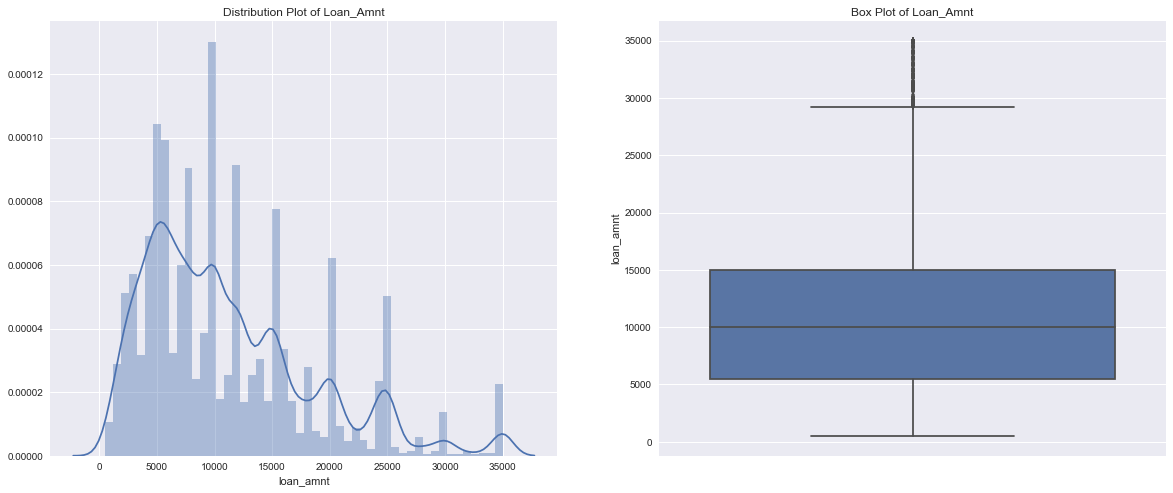

In [45]:
univariateCont(df=loan,col='loan_amnt')

<font color='red'><b>Observation</b>: We could clearly see that the most of the loan amounts are distributed between 5000 to 15000

#### Interest Rate

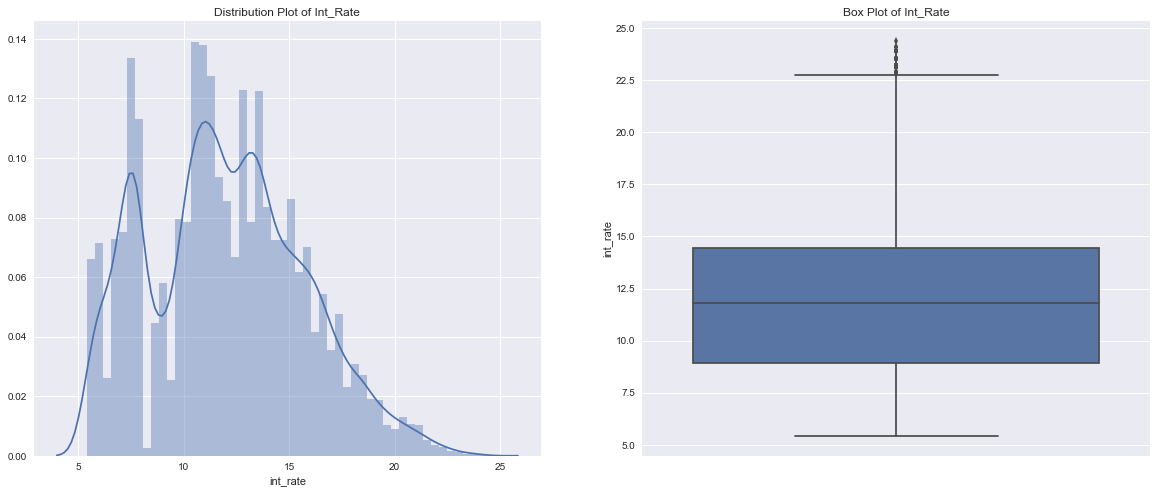

In [46]:
univariateCont(df=loan,col='int_rate')

<font color='red'><b>Observation</b>: Most of the loans interest rates are distributed between 9% to 15%.

#### Annual Income

In [47]:
loan.annual_inc
round(loan["annual_inc"].describe(),2)

count      35367.00
mean       69095.99
std        63967.05
min         4000.00
25%        41500.00
50%        60000.00
75%        82500.00
max      6000000.00
Name: annual_inc, dtype: float64

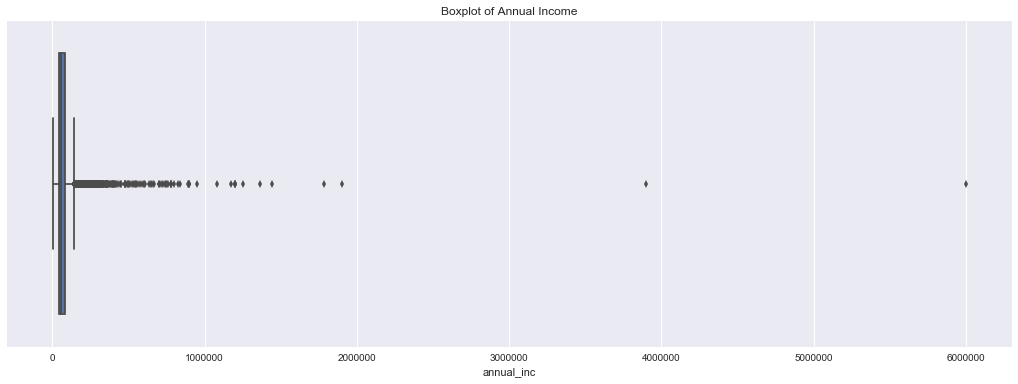

In [48]:
plt.figure(figsize=(18,6))
plt.title("Boxplot of Annual Income")
sns.boxplot(y=loan['annual_inc'],orient='h')
plt.show()

<font color='red'><b>Observation</b>: From the above plot of Annual income, we could see there are some outliers, and that may effect the result, hence will remove these records from Annual income

In [49]:
loan.annual_inc.sort_values()

35501       4000.0
29283       4080.0
36639       4800.0
36773       5500.0
4261        6000.0
15517       6000.0
29517       6000.0
34208       7000.0
23269       7200.0
31990       7500.0
31385       7800.0
20132       8000.0
34707       8000.0
36687       8000.0
35539       8000.0
24632       8004.0
36955       8088.0
9078        8472.0
38927       8500.0
15308       9000.0
23529       9000.0
17409       9600.0
9511        9600.0
15296       9600.0
9287        9600.0
33962       9600.0
27625       9600.0
29589       9600.0
9504        9600.0
34691       9600.0
           ...    
12781     750000.0
24811     756000.0
33696     762000.0
34612     780000.0
33455     780000.0
25643     780000.0
26472     780000.0
21282     780000.0
31863     800000.0
22879     828000.0
30011     840000.0
25168     889000.0
34184     900000.0
25819     900000.0
7531      900000.0
34297     900000.0
21379     948000.0
28906    1080000.0
27564    1176000.0
33432    1200000.0
21412    1200000.0
24166    120

In [50]:
#Remove Outliers (values from 99 to 100%)
AnnInc_outliers = loan["annual_inc"].quantile(0.995)
loan = loan[loan["annual_inc"] < AnnInc_outliers]
loan["annual_inc"].describe()

count     35178.000000
mean      66591.220524
std       36698.669917
min        4000.000000
25%       41050.750000
50%       59700.000000
75%       82000.000000
max      294000.000000
Name: annual_inc, dtype: float64

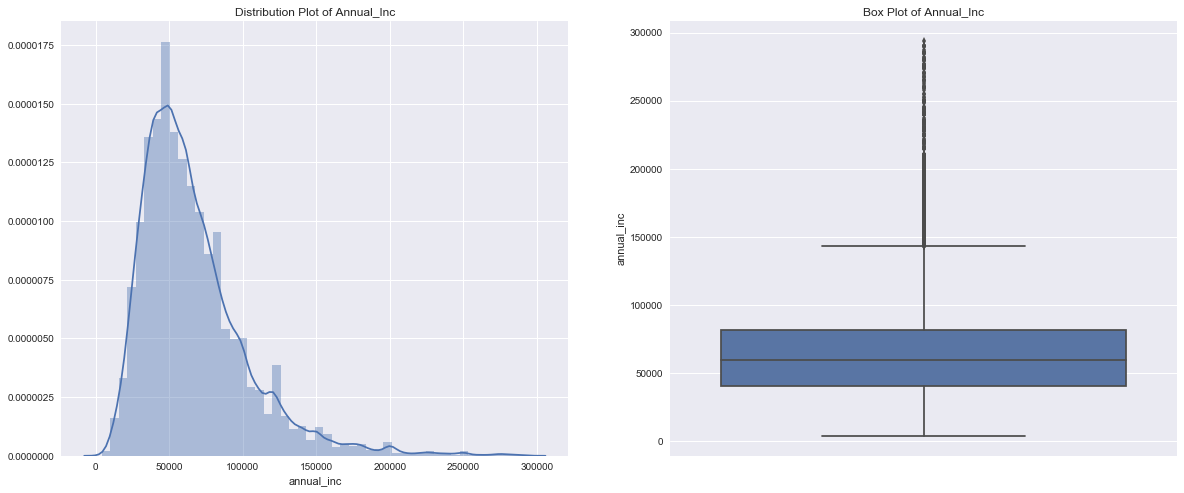

In [51]:
univariateCont(df=loan,col='annual_inc')

### Categorical Variables

#### Loan Status

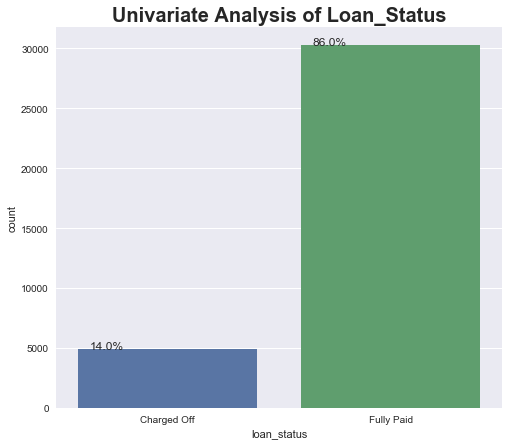

In [52]:
univariateCatg(df=loan,col='loan_status',type=1)

<font color='red'><b>Observation</b>: 14% of loans are defaulted

#### Purpose of Loan

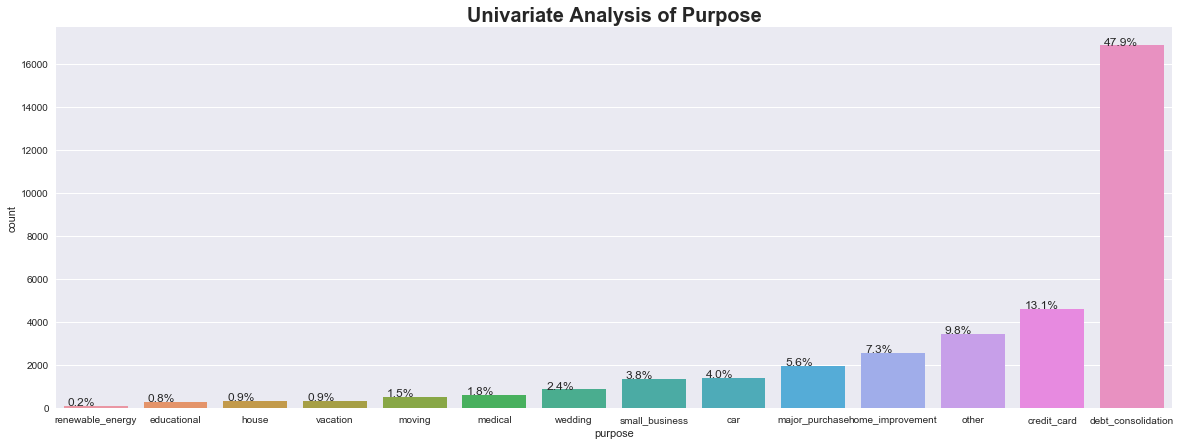

In [53]:
univariateCatg(df=loan,col='purpose',type=1)

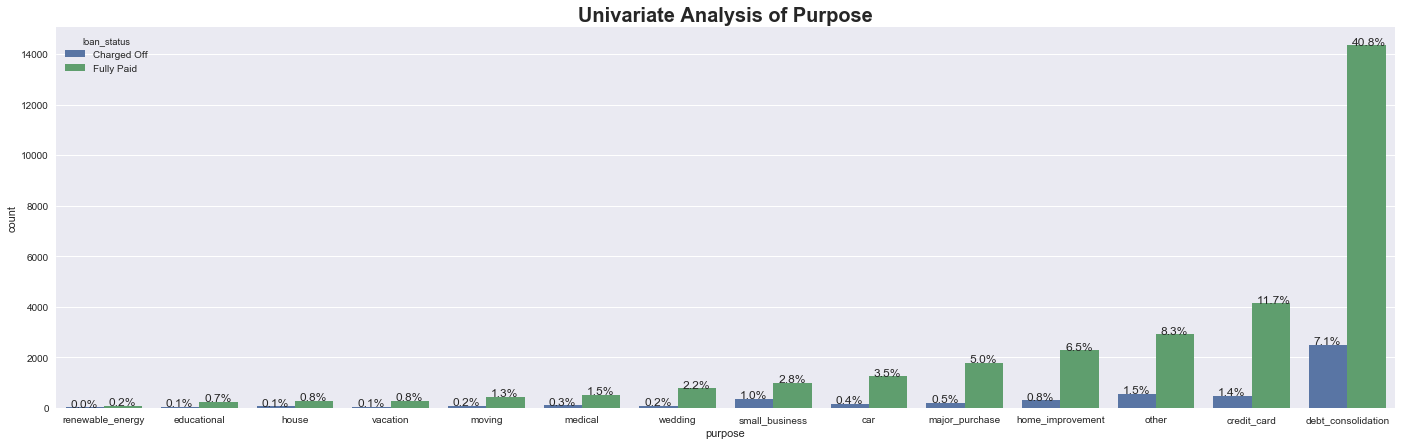

In [54]:
# Purpose with respect to Loan_status
univariateCatg(df=loan,col='purpose',hue='loan_status',type=1)

<font color='red'><b>Observation</b>: Approx 48% of the applicants applied loan for paying their other loans(Debt Consolidation)

#### Home Ownership wise Loan

In [55]:
loan.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

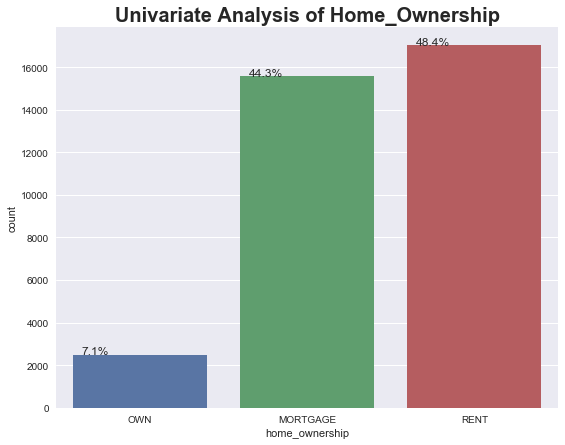

In [56]:
univariateCatg(df=loan[loan['home_ownership']!="OTHER"],col='home_ownership',type=1)

<font color='red'><b>Observation</b>: 48% of applicants are living in rented home whereas 44% applicants have mortagaged their homes

#### Year wise Loan

In [57]:
data = loan.groupby("issue_d_year").size() 
pal = sns.dark_palette("Green", len(data))
rank = data.argsort().argsort()

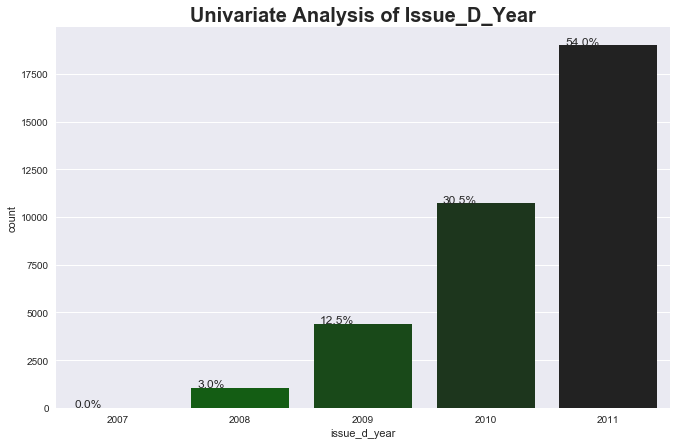

In [58]:
univariateCatg(df=loan.sort_values('issue_d_year',ascending=False),col='issue_d_year',clr=np.array(pal[::-1])[rank],type =1)

<font color='red'><b>Observation</b>:  loan applicants are increasing year on year, approx 55% of loan applicants received loans in 2011</font>

#### Loan Term

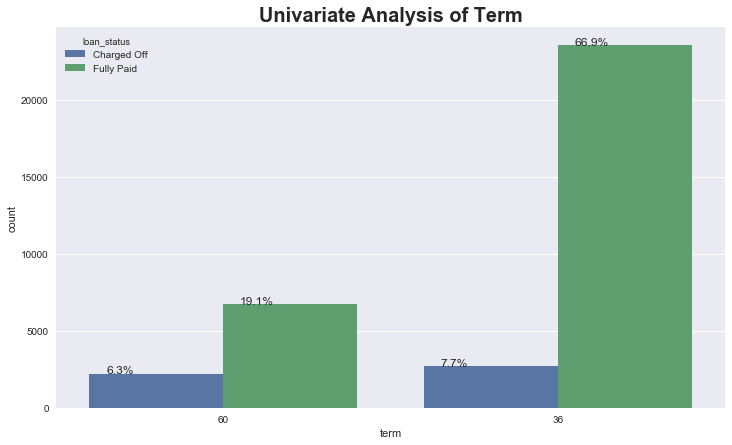

In [59]:
univariateCatg(df=loan,col='term',type = 1,hue='loan_status')

#plt.figure(figsize = (15,6))
#sns.countplot(data = loan, x= loan['term'], order=loan['term'].value_counts().index,hue = loan['loan_status']) 

<font color='red'><b>Observation</b>: 74% (66.9% + 7.7%) of applicants applied loan for 36 months term period of which approx. 8% (~7.7%) are defaulted.</font> 

### 4.2 Bivariate/Multivariate Analysis
To find the relationship between two or more variables We use Bivariate/Multivariate analysis.  It can be any combinations between categorical and continuous variables.


#### 1. Purpose of Loan vs Loan Amount for each Loan Status

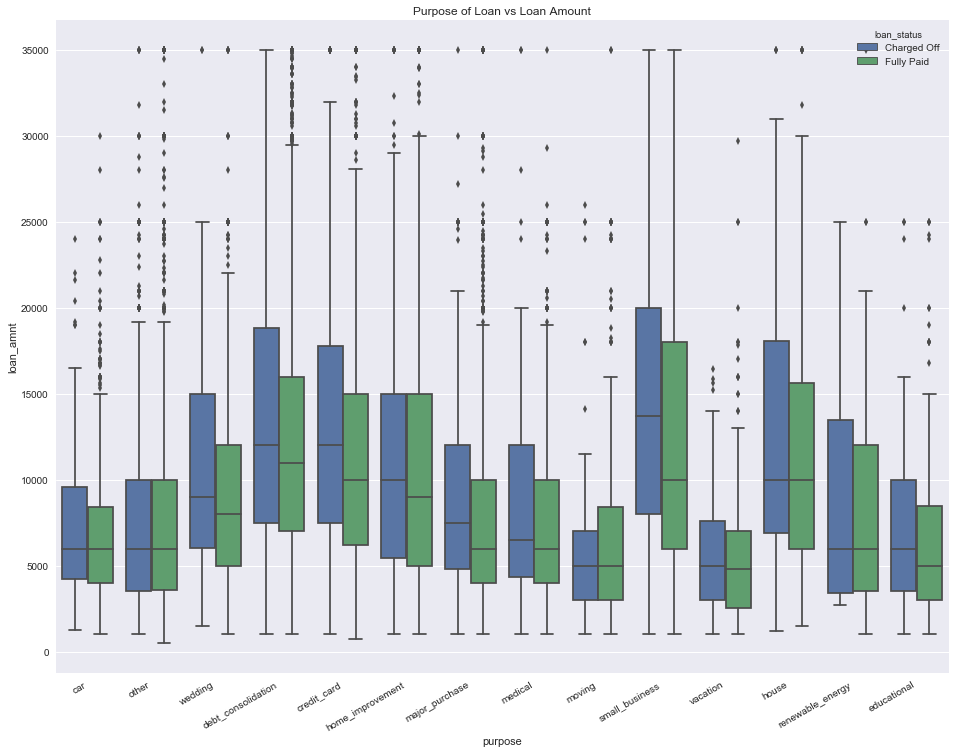

In [62]:
plt.figure(figsize=(16,12))
ax = sns.boxplot(data =loan[loan['loan_status']!='Current'], x='purpose', y='loan_amnt',hue='loan_status')
plt.title('Purpose of Loan vs Loan Amount')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

<font color = "red"><b>Observation</b> : Median value of small business in charged off boxplot is higher than all the others.
Therefore its risky</font>

#### 2. Correlation Matrix : All Continuos(Numeric) Variables

In [63]:
loan_correlation = loan.corr()
loan_correlation

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,loan_amnt_annual_inc_ratio,monthly_income,monthly_installment_monthly_inc_perc,issue_d_year,earliest_cr_line_year,earliest_cr_line_month
loan_amnt,1.000000,0.981555,0.951735,0.350656,0.297761,0.930438,0.145487,0.408059,0.068066,-0.037628,...,0.047994,0.144631,0.079617,0.476721,0.628693,0.408059,0.536380,0.115278,-0.193390,-0.016593
funded_amnt,0.981555,1.000000,0.971232,0.329291,0.302853,0.956570,0.145389,0.403806,0.068237,-0.037581,...,0.050149,0.144833,0.081168,0.480938,0.616122,0.403806,0.562178,0.128976,-0.185717,-0.015340
funded_amnt_inv,0.951735,0.971232,1.000000,0.340875,0.293619,0.922455,0.151721,0.389807,0.071392,-0.041443,...,0.036625,0.136454,0.070551,0.473026,0.599022,0.389807,0.541612,0.217359,-0.173092,-0.014419
term,0.350656,0.329291,0.340875,1.000000,0.441208,0.090586,0.101019,0.071392,0.075443,0.008936,...,0.019457,0.115938,0.042357,0.274423,0.284738,0.071392,0.013373,0.229525,-0.044863,-0.016385
int_rate,0.297761,0.302853,0.293619,0.441208,1.000000,0.274483,0.000102,0.066021,0.113337,0.157720,...,0.099852,0.132464,0.076763,0.175624,0.217042,0.066021,0.191815,0.025717,0.117425,-0.010531
installment,0.930438,0.956570,0.922455,0.090586,0.274483,1.000000,0.119296,0.405513,0.059153,-0.026490,...,0.057234,0.121514,0.078831,0.413816,0.568716,0.405513,0.602185,0.061329,-0.169578,-0.012460
emp_length,0.145487,0.145389,0.151721,0.101019,0.000102,0.119296,1.000000,0.165029,0.049200,0.013355,...,-0.012910,0.028579,0.011341,0.079788,0.001011,0.165029,-0.034504,0.095618,-0.287719,-0.043723
annual_inc,0.408059,0.403806,0.389807,0.071392,0.066021,0.405513,0.165029,1.000000,-0.119698,0.027571,...,0.014530,0.039758,0.025360,0.219097,-0.310591,1.000000,-0.338070,0.037770,-0.303659,-0.016694
dti,0.068066,0.068237,0.071392,0.075443,0.113337,0.059153,0.049200,-0.119698,1.000000,-0.034477,...,-0.008534,0.026574,0.012922,0.010718,0.142727,-0.119698,0.130368,0.077478,-0.044885,0.011169
delinq_2yrs,-0.037628,-0.037581,-0.041443,0.008936,0.157720,-0.026490,0.013355,0.027571,-0.034477,1.000000,...,0.027965,0.011531,0.013630,-0.014763,-0.066000,0.027571,-0.054081,0.003335,-0.068509,-0.002087


#### 3. HeatMap: All continuos variables

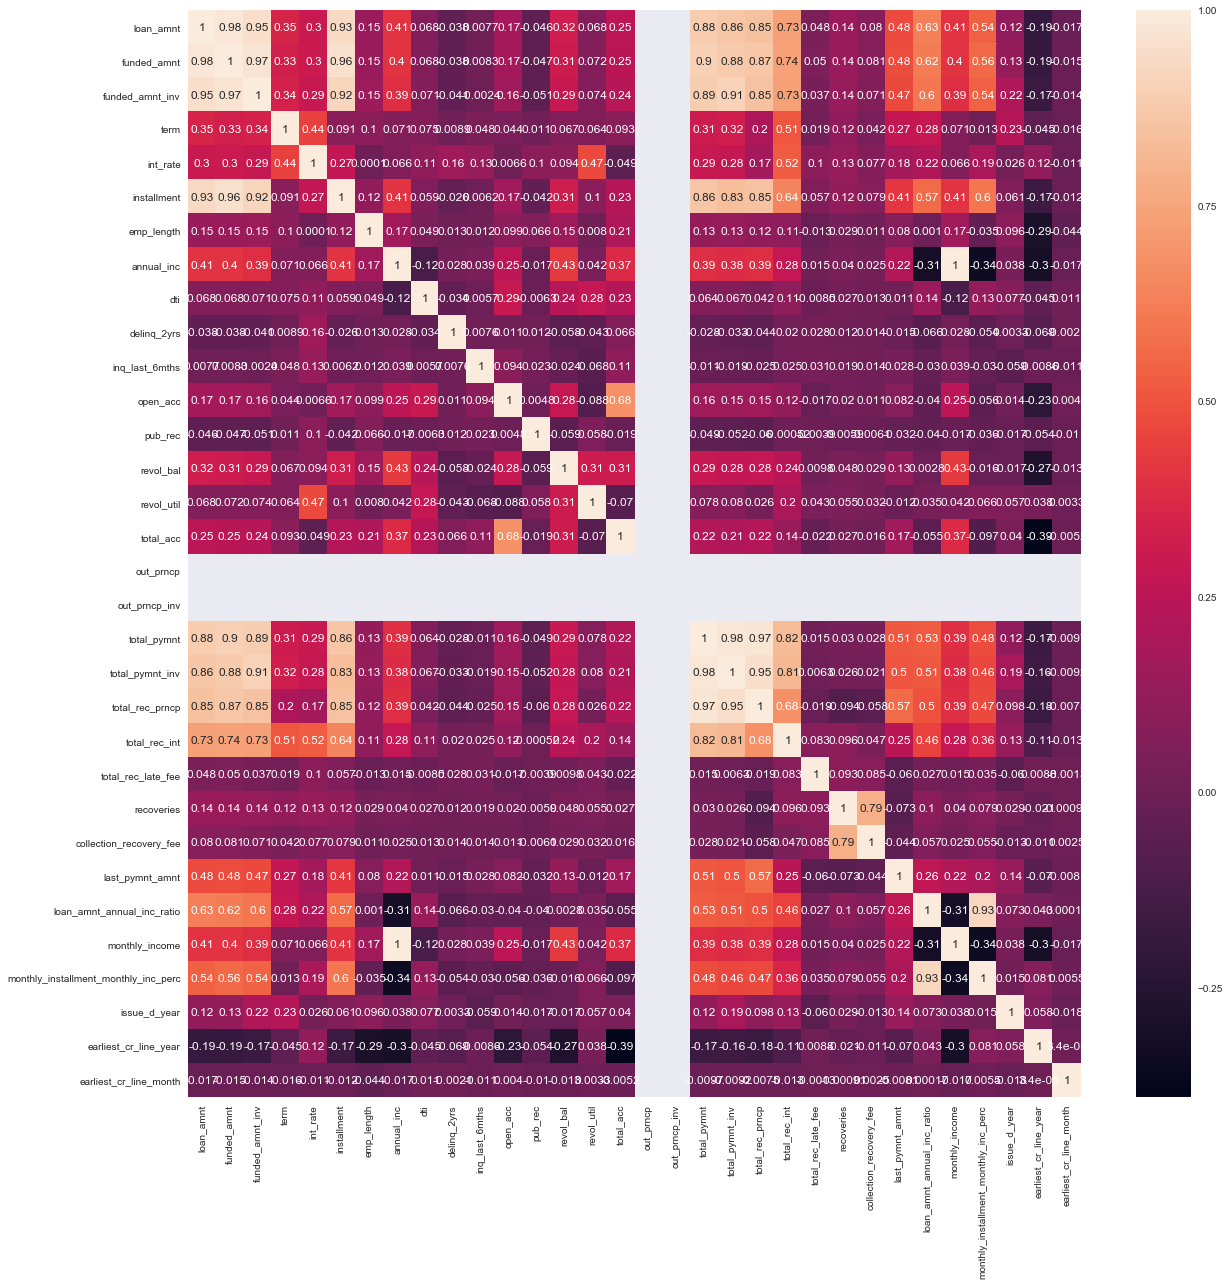

In [64]:
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(loan_correlation, 
            xticklabels=loan_correlation.columns.values,
            yticklabels=loan_correlation.columns.values,annot= True)
plt.show()

<font color='blue'>From the above plot, we could clearly see that <b>out_prncp</b> and <b>out_prncp_inv</b> are all 0's because the loan status which is <b>Current</b> were removed. So we will not take these for our observations</font> 

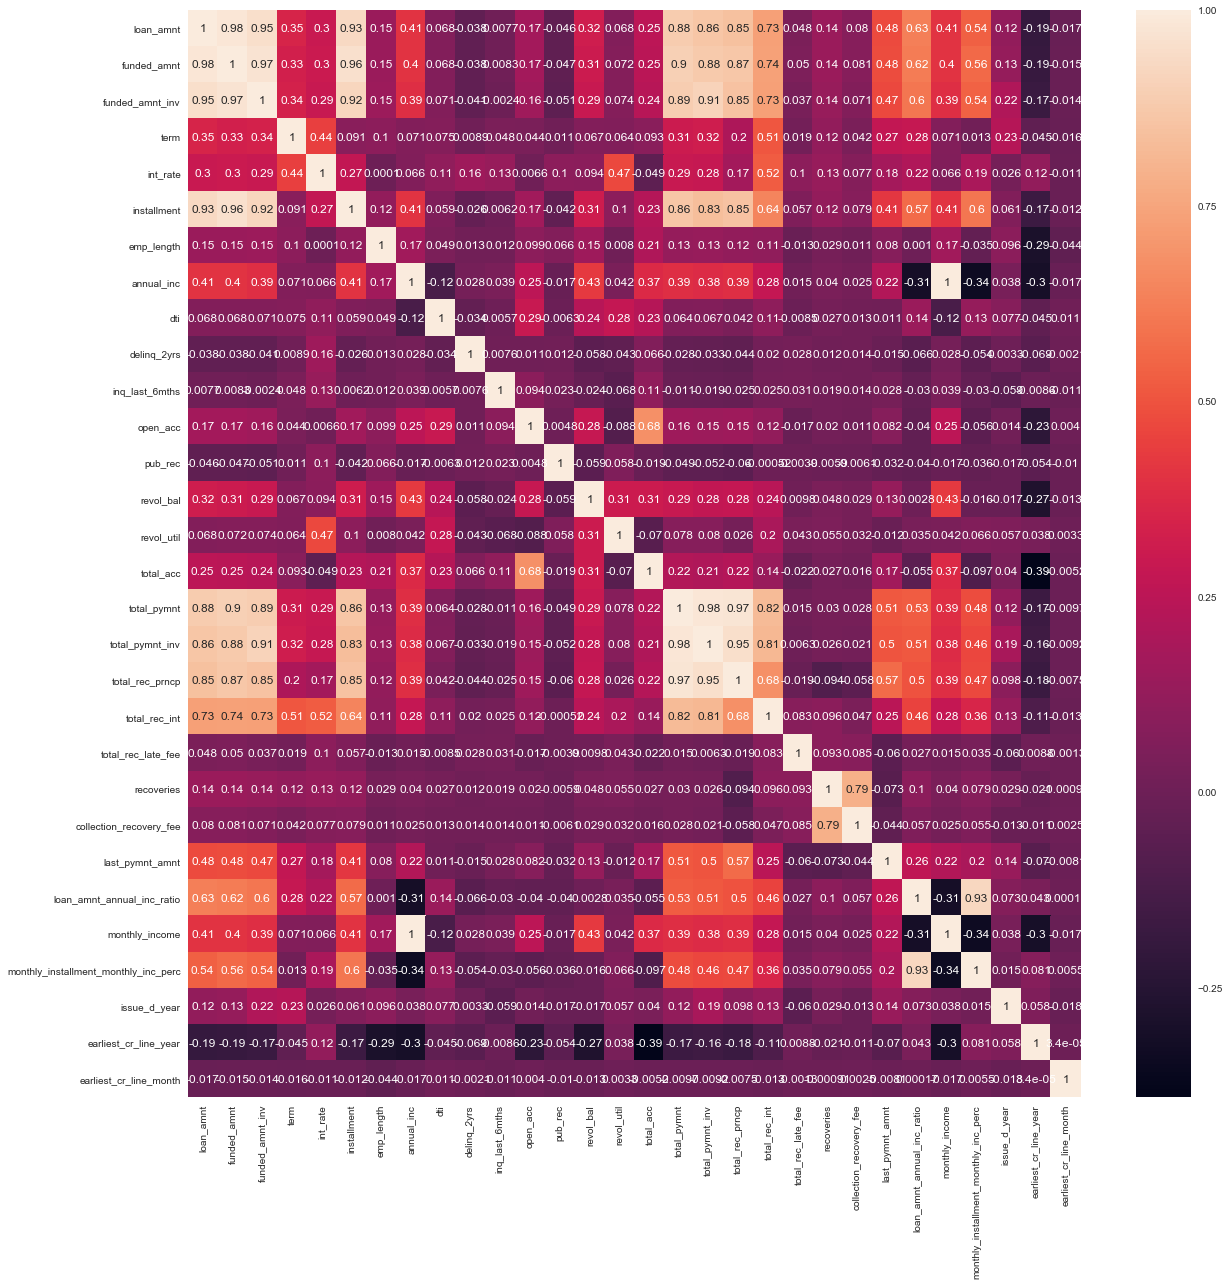

In [65]:
loan1=loan.drop(['out_prncp', 'out_prncp_inv'], axis=1)
loan_correlation1 = loan1.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(loan_correlation1, 
            xticklabels=loan_correlation1.columns.values,
            yticklabels=loan_correlation1.columns.values,annot= True)
plt.show()

<font color='red'><b>Observation</b>: Now, it is very clear from the Heatmap that how <b>'loan_amnt','funded_amnt' & 'funded_amnt_inv'</b> are closely <b>interrelated</b>.So we can take any one column out of them for our analysis.
</font> 

#### 4. Employment Length vs Loan Amount for different pupose of Loan

In [66]:
loanstatus=loan.pivot_table(index=['loan_status','purpose','emp_length'],values='loan_amnt',aggfunc=('count')).reset_index()

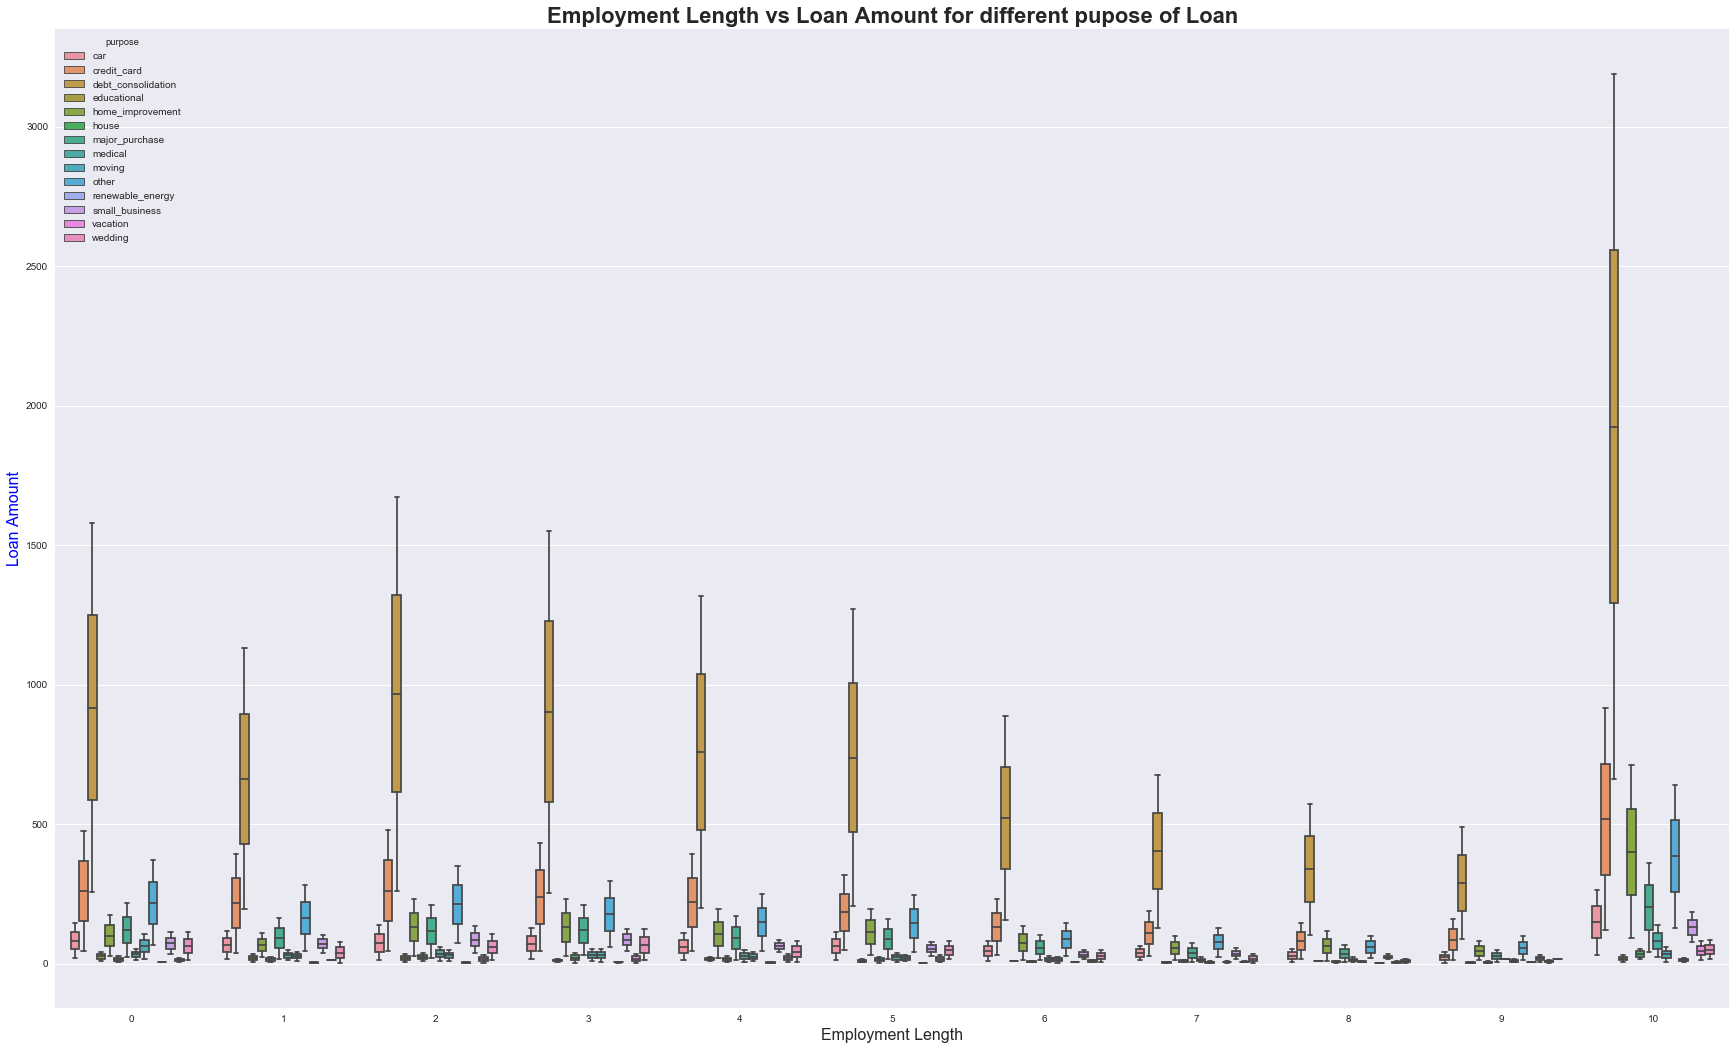

In [67]:
ax = plt.figure(figsize=(30, 18))
ax = sns.boxplot(x='emp_length',y='loan_amnt',hue='purpose',data=loanstatus)
ax.set_title('Employment Length vs Loan Amount for different pupose of Loan',fontsize=22,weight="bold")
ax.set_xlabel('Employment Length',fontsize=16)
ax.set_ylabel('Loan Amount',color = 'b',fontsize=16)
plt.show()

<font color = "red"><b>Observation</b> We could not find any concrete insight from the feature <b>Employment_length</b>, hence mostly will not be considering this in our result set. </font>

### 4.3 Bivariate/Multivariate Analysis with Probability of Charge off

### Categorical Variables vs Probability of Charged Off

The goal of studying and analyzing this data set is to find out the parameters that affect the repayment of loans
That means a Probability Value for the custormers who will default may give us an idea whether to sanction a loan or not. 

This can be represented in the form of an equation as follows:

\begin{equation*}
{Probability\:of\:Charged\:Off =\:}\frac{Number\:of\:Applicants\:who\:charged\:off}{Total\:No.\:of\:Applicants}
\end{equation*}


Calculation of this probability w.r.t each column using bivariate analysis to see how the Probability of Charged Off changes with these columns

To simplify this and avoid repeatitions in the code, a User Defined Function (UDF) can be useful.

##### 'crosstab' function will be used to get the summarized table for each column(passed as a variable) along with probability of charge off w.r.t that column.

In [68]:
def crosstab_func(df,col):
    '''
    df : Dataframe
    col: Column Name
    '''
    crosstab_df = pd.crosstab(df[col], df['loan_status'],margins=True,dropna=False)
    crosstab_df['Prob_Default'] = round((crosstab_df['Charged Off']/crosstab_df['All']*100),3)
    crosstab_df = crosstab_df[0:-1]
    return crosstab_df

##### 'bivariate_prob' function will be used to plot count of values for each column(passed as a variable) stacked across 'loan_status' along with probability of charged off or default  as a line chart.

In [69]:
# Probability of charge off
def bivariate_prob(df,col,stacked= True,x =10):
    '''
    df      : Dataframe
    col     : Column Name
    stacked : True(default) for Stacked Bar
    '''
    # get dataframe from crosstab function
    plotCrosstab = crosstab_func(df,col)
    plotCrosstab.reset_index(inplace=True)
    plotCrosstab=plotCrosstab.sort_values('Prob_Default',ascending=False).set_index(col).head(x)
    print(plotCrosstab.iloc[:,[-1]])
    #def label_point(x, y, val, ax):
    #a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    #for i, point in a.iterrows():
    #    ax.text(point['x'], point['y'], str(point['val']))
    barPlot =  plotCrosstab.iloc[:,0:2]
    linePlot = plotCrosstab[['Prob_Default']]  
    #df = pd.Series(plotCrosstab_test.index.values.tolist())
    #ax = linePlot.plot(figsize=(20,8), marker='o',color = 'b')
    #label_point(df, plotCrosstab_test['Probability_Charged Off'], plotCrosstab_test['Probability_Charged Off'], ax)
    
    ax = barPlot.plot(kind='bar',rot=1,stacked=stacked)
    ax2 = linePlot.plot(figsize=(20,8),ax=ax,secondary_y=True, marker='o',color = 'b')
    ax.set_title(df[col].name.title()+' vs Probability Charge Off',fontsize=20,weight="bold")
    ax.set_xlabel(df[col].name.title(),fontsize=14)
    ax.set_ylabel('Probability of Charged off',color = 'b',fontsize=14)
    ax2.set_ylabel('Number of Applicants',color = 'g',fontsize=14)
    
    
    y = plotCrosstab['Prob_Default']
    #print(y)
    x = pd.Series(np.array(range(0,len(y))).tolist())
    y.reset_index(name="Value",drop=True,inplace=True)
    a = pd.concat({'x': x, 'y': y, 'val': y}, axis=1)
    #print(a)
    for i, point in a.iterrows():
        #print(point)
        ax2.text(point['x'], point['y'], str(point['val']),color='xkcd:dark green', fontsize=15,alpha=0.5,fontweight='bold')
        
    plt.grid(None)
    plt.show()
    
   # label_point(x, y, y, ax2)
    

#### 1. Location vs Probability Charge Off

loan_status  Prob_Default
addr_state               
NV                 21.868
TN                 20.000
AK                 19.444
SD                 18.182
NM                 17.391
FL                 17.215
HI                 16.993
OR                 15.869
MO                 15.677
GA                 15.570


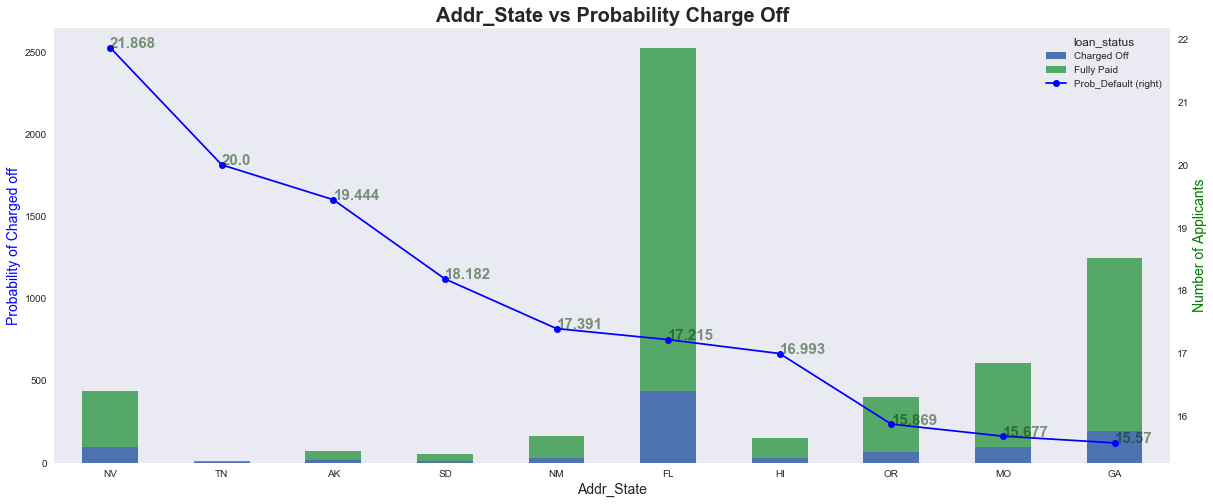

In [70]:
#states = crosstab_func(loan,'addr_state')
#display(states.tail(10))
bivariate_prob(df =loan,col ='addr_state')

<font color='red'><b>Observation</b>: Top 10 States/Provinces with high probability of charge off, highest being 'NV' is more than 21%</font>   

#### 2. Purpose of Loan vs Probability Charge Off

loan_status         Prob_Default
purpose                         
small_business            26.453
renewable_energy          17.647
educational               16.364
house                     16.000
other                     15.748
medical                   15.372
moving                    15.058
debt_consolidation        14.862
vacation                  14.759
home_improvement          11.327


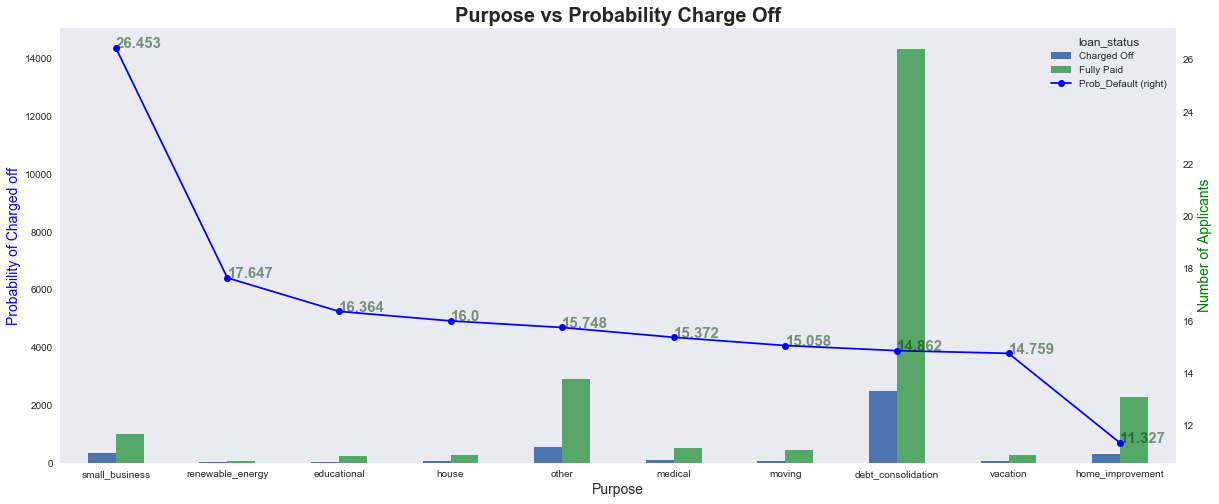

In [71]:

bivariate_prob(df =loan,col ='purpose',stacked=False)

<font color='red'><b>Observation</b>: Applicants who has taken the Loan for 'small business' has the highest probabilty of 'charge off'/'default' of 26%. So the loan with collateral condition may help recovery</font>   

#### 3. Grade/Subgrade vs Probability Charge Off

loan_status  Prob_Default
grade                    
G                  33.333
F                  31.839
E                  26.245
D                  21.087
C                  16.321
B                  11.701
A                   5.629


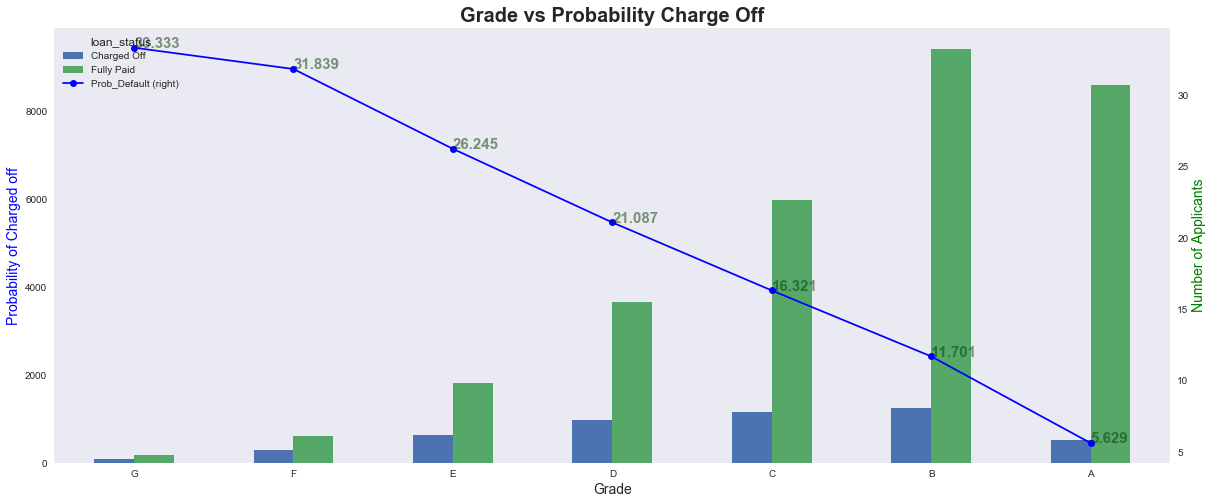

loan_status  Prob_Default
sub_grade                
F5                 47.423
G3                 45.000
G5                 37.500
G2                 36.111
F4                 35.821
G1                 30.233
E4                 29.412
F2                 29.108
F1                 28.621
F3                 28.481


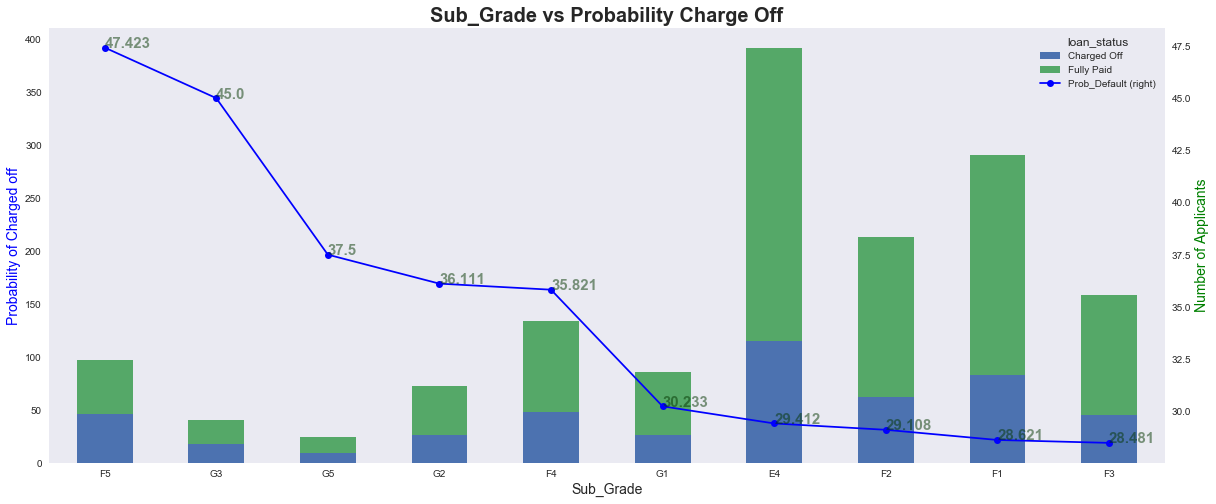

In [72]:
bivariate_prob(df =loan,col ='grade',stacked=False)
bivariate_prob(df =loan,col ='sub_grade')

<font color='red'><b>Observation</b>: As we move from Grade A to G, probability that person will be charged off is increasing.</font>      

#### 4. Annual Income Range vs Probability Charge Off

loan_status       Prob_Default
annual_inc_range              
0-25000                 17.887
25000-50000             15.959
50000-75000             13.899
75000-100000            11.672
100000 and above        10.555


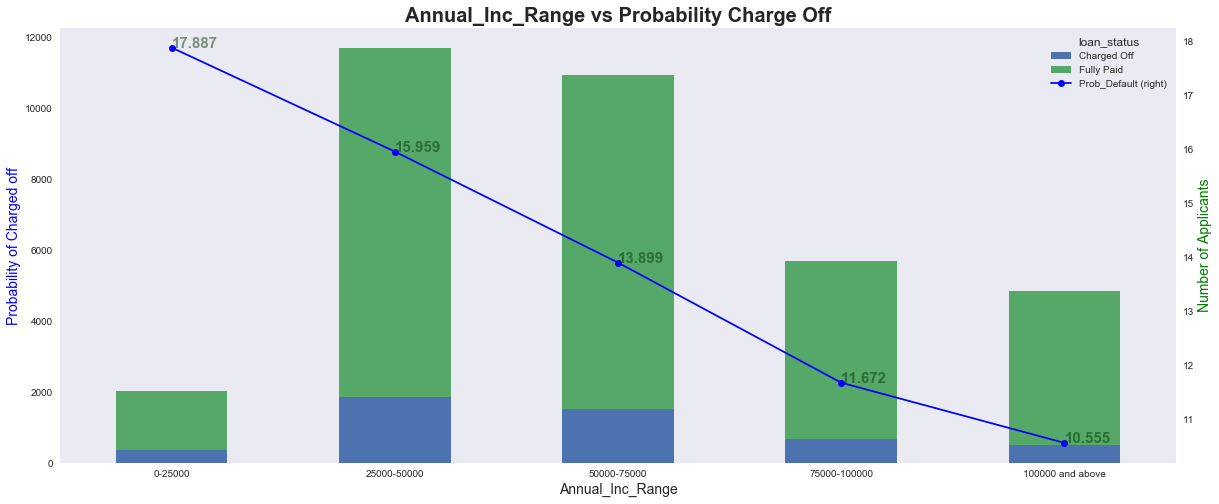

In [73]:
bivariate_prob(df =loan,col ='annual_inc_range')

<font color='red'><b>Observation</b>: As the annual income is decreasing, the probability that person will default is increasing with highest of approx. 18% at salary bracket of 0-25000.</font>      

#### 5. Interest rate Range vs Probability Charge Off

loan_status     Prob_Default
int_rate_range              
15 and above          24.181
12.5-15               15.691
10-12.5               12.512
7.5-10                 7.551
0-7.5                  4.424


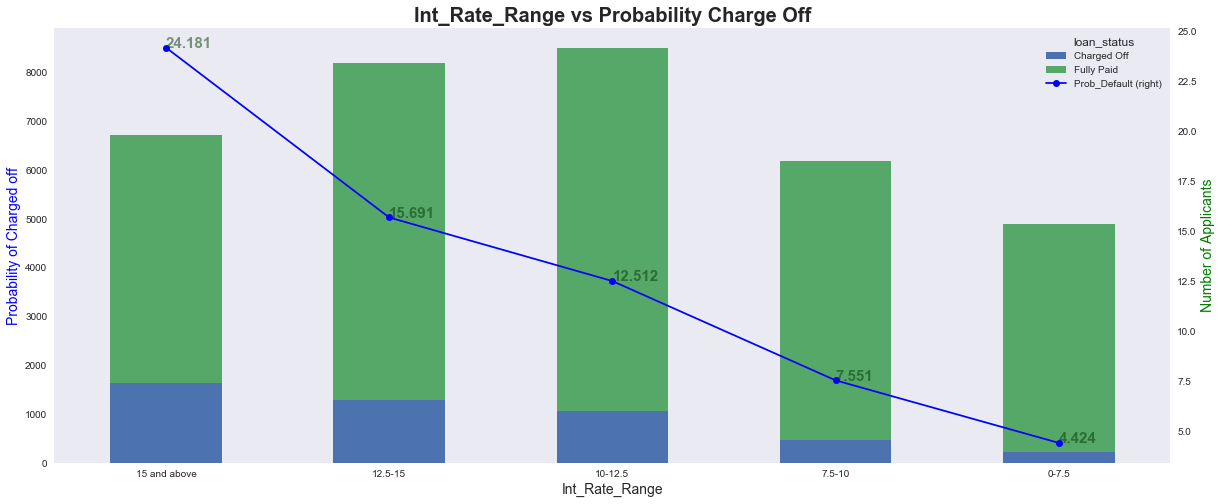

In [74]:
bivariate_prob(df =loan,col ='int_rate_range')

<font color='red'><b>Observation</b>: As the interest rate is increasing the probability that person will default is increasing with highest of 24% at 15% & above bracket.</font>      

#### 6. Public Record Bankruptcies vs Probability Charge Off


In [75]:
loan.pub_rec_bankruptcies.unique()

array(['0', '1', '2'], dtype=object)

loan_status           Prob_Default
pub_rec_bankruptcies              
2                           40.000
1                           21.233
0                           13.677


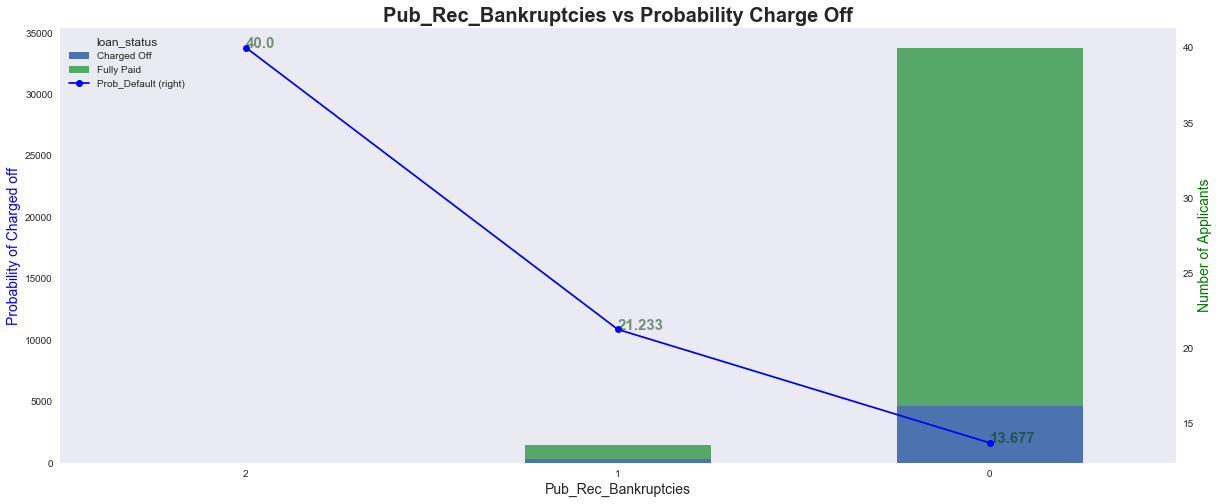

In [76]:
bivariate_prob(df =loan,col ='pub_rec_bankruptcies')

<font color='red'><b>Observation</b>:Number of prior bankruptcies has a clear impact.  The people who have been bankrupt earlier there are more chances of default.</font>      

#### 7. Employment Length vs Probability Charge Off

In [77]:
loan['emp_length']=loan['emp_length'].apply(str)

loan_status  Prob_Default
emp_length               
10                 15.404
7                  15.144
8                  14.127
5                  13.904
6                  13.875
1                  13.829
3                  13.611
0                  13.338
4                  13.267
2                  12.964


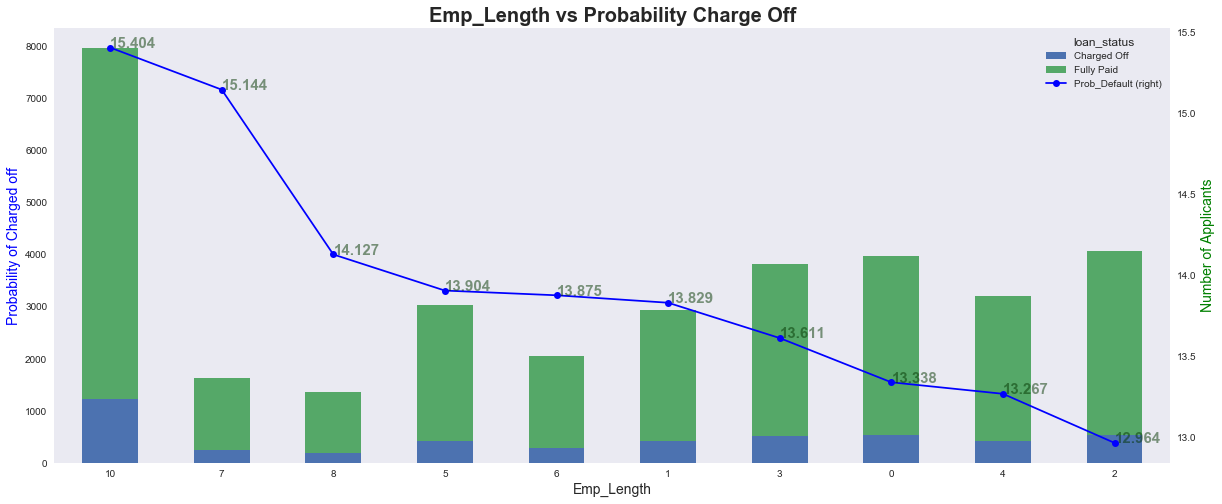

In [78]:
bivariate_prob(df =loan,col ='emp_length')

<font color='red'><b>Observation</b>: There is no clear impact of Emp length on defaults </font> 

***
## 5. Conclusion

#### Target Variable
* <font color='blue'><b>Loan Status</b></font>

#### Top-5 Major variables to consider for loan prediction: 
1. <font color='blue'><b>Purpose of Loan</b></font>
2. <font color='blue'><b>Public Record Bankruptcies</b></font>
3. <font color='blue'><b>Grade</b></font>
4. <font color='blue'><b>Interest Rate</b></font>
5. <font color='blue'><b>Term</b></font>

# ------------------------------------------------------------------------------- #